In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# 1- Importing Dataset

In [2]:
df = pd.read_csv("/kaggle/input/house-price-tehran-iran/housePrice.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/house-price-tehran-iran/housePrice.csv'

# 2- Preprocessing

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [ ]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [ ]:
df["Area"].min()

' 1,000 '

In [ ]:
df["Area"].max()

'99'

## 2-1 Cleaning Dataset and Remove Outliners

In [ ]:
df["Area"] = df["Area"].astype("str").replace('\D', '', regex=True).astype('int64')

In [ ]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [ ]:
df.drop(df[df['Area']<10].index,axis=0,inplace=True)
df.drop(df[df['Area']>1000].index,axis=0,inplace=True)

In [ ]:
df["Area"].min()

30

In [ ]:
df["Area"].max()

1000

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

## 2-2 Label Encoding

In [ ]:
le_Parking = preprocessing.LabelEncoder()
le_Parking.fit(["FALSE","TRUE"])
df["Parking"] = le_Parking.fit_transform(df["Parking"])

In [ ]:
le_Warehouse = preprocessing.LabelEncoder()
le_Warehouse.fit(["FALSE","TRUE"])
df["Warehouse"] = le_Warehouse.fit_transform(df["Warehouse"])

In [ ]:
le_Elevator = preprocessing.LabelEncoder()
le_Elevator.fit(["FALSE","TRUE"])
df["Elevator"] = le_Elevator.fit_transform(df["Elevator"])

In [ ]:
le_Address = preprocessing.LabelEncoder()
le_Address.fit(df["Address"].unique())
df["Address"] = le_Address.fit_transform(df["Address"])

## 2-3 Defining X(features) and y(labels)

In [ ]:
X = df[["Area","Room","Parking","Warehouse","Elevator","Address"]].to_numpy()
y = df[["Price","Price(USD)"]].to_numpy()

## 2-4 Normalizing Dataset

### 2-4-1 Before Normalization

In [ ]:
print(X.mean(), X.std())

36.13078334782189 60.93687080452216


### 2-4-2 Normalization

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

### 2-4-3 After Normalization

In [ ]:
print(X.mean(), X.std())

-1.647157892228572e-17 1.0


## 2-5 Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3- Training a Random Forest Model

In [ ]:
rfregr = RandomForestRegressor()
rfregr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf_y_pred = rfregr.predict(X_test)

## 3-1 Model Evaluation

In [ ]:
r2_score(y_test, rf_y_pred)

0.6623065277609995

# 4- Training a Desicion Tree Model

## 4-1 Finding the best depth for model 

In [ ]:
scores = []
for depth in range(1,100):
    dtregr = DecisionTreeRegressor(max_depth=depth)
    dtregr.fit(X_train, y_train)
    dt_y_pred = dtregr.predict(X_test)
    scores.append(r2_score(y_test, dt_y_pred))

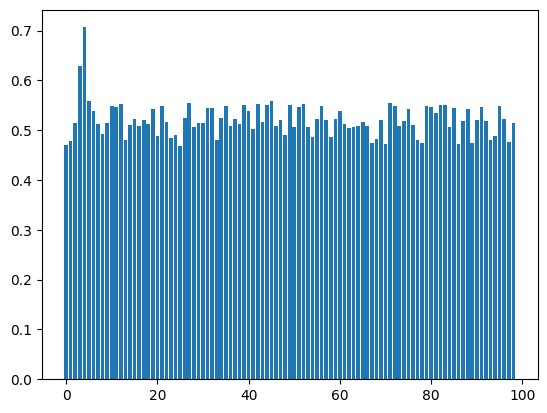

In [ ]:
plt.bar(range(len(scores)), scores)
plt.show()

In [ ]:
depth = scores.index(max(scores))

## 4-2 Modeling With The Best Depth

In [ ]:
dtregr = DecisionTreeRegressor(max_depth=depth)
dtregr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
dt_y_pred = dtregr.predict(X_test)

### 4-2-1 Model Evaluation

In [ ]:
r2_score(y_test, dt_y_pred)

0.6281924286439088

# 5- Training a Linear Regression Model

In [ ]:
lrregr = LinearRegression()
lrregr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_y_pred = lrregr.predict(X_test)

## 5-1 Model Evaluation

In [ ]:
r2_score(y_test,lr_y_pred)

0.5372240925168674

# According to R2 scores, it is concluded that the random forest model is the best model.